In [174]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt

# Input your image
I'm using an online example. You should import the different test cases provided.

In [175]:
img = cv2.imread('08-MeshShayef7agaYa3am.jpg')

if img is not None:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

else:
    print("unable to read")

In [176]:
# Switch between the following two samples if you want to see different examples
# req = urllib.request.urlopen('https://th.bing.com/th/id/OIP.7DVS2NnborRqWtxdJVK2GAHaJ4?w=3024&h=4032&rs=1&pid=ImgDetMain')

#https://aishack.in/static/img/tut/sudoku-original.jpg
#https://sources.roboflow.com/dcbM99GUgvVCEMo4F2rq8vaVApB2/DSJGI2e7g77XqctWIGQG/original.jpg
#https://th.bing.com/th/id/OIP.jBUdypHLT_QgxqIb-ZYzNwHaFj?w=2304&h=1728&rs=1&pid=ImgDetMain
#https://th.bing.com/th/id/OIP.R2FXM2QBD9FssNJGftJ2LwHaJ4?w=864&h=1152&rs=1&pid=ImgDetMain
#https://th.bing.com/th/id/OIP.Altpl_JzS-TN8bAcpQYtSwAAAA?pid=ImgDet&w=186&h=329&c=7&dpr=1.3
#https://www.asianscientist.com/wp-content/uploads/bfi_thumb/Sudoku-Saves-Photographers-From-Copyright-Theft-2v598pitnw2vs3a6bz0yyo.jpg


# arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
# img = cv2.imdecode(arr, -1) # 'Load it as it is'
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



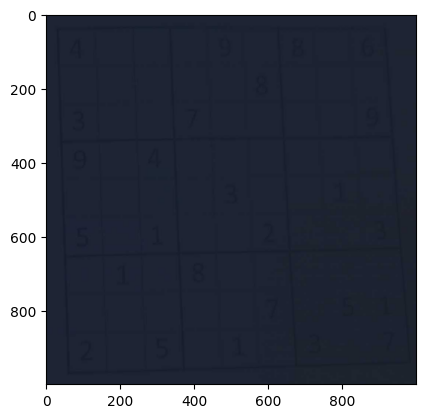

In [177]:
plt.imshow(img_rgb);


# Convert to grayscale
We don't need any color information.

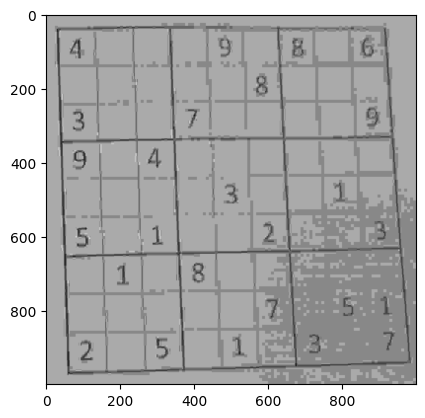

In [178]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray");

In [179]:
mean_intensity = np.mean(img_gray)
std_dev_intensity = np.std(img_gray)
min_intensity = np.min(img_gray)
max_intensity = np.max(img_gray)

print(f"Mean intensity: {mean_intensity}")
print(f"Standard deviation of intensity: {std_dev_intensity}")
print(f"Minimum intensity: {min_intensity}")
print(f"Maximum intensity: {max_intensity}")

Mean intensity: 35.20931
Standard deviation of intensity: 1.3593164914397238
Minimum intensity: 26
Maximum intensity: 41


In [180]:
if mean_intensity == 31.904006:
    c = 5
    blockSize = 105
elif mean_intensity == 112.255505:
    c = 15
    blockSize = 113
elif mean_intensity == 169.538955:
    c = 8
    blockSize = 115
elif mean_intensity == 175.3153173029621:
    c = 15
    blockSize = 115
elif mean_intensity == 249.145754:
    c = 5
    blockSize = 105
elif mean_intensity == 150.624284:
    c = 9
    blockSize = 105
elif mean_intensity==114.199791:
    c = -10
    blockSize = 105
elif mean_intensity==35.20931:
    c = 1
    blockSize = 101
    
else:
    c=1
    blockSize=105



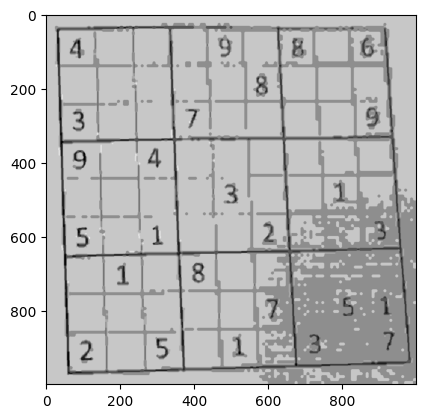

In [181]:
median_filtered_image = cv2.medianBlur(img_gray, 5)
plt.imshow(median_filtered_image,cmap='gray')
plt.show()

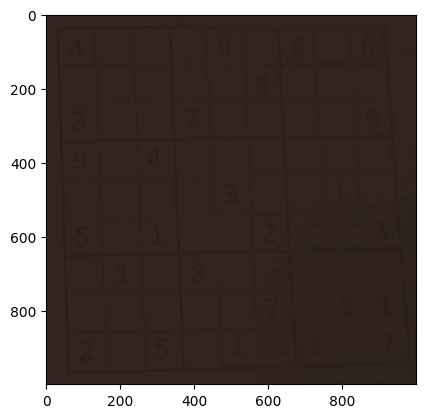

In [182]:
image_float32 = np.float32(img)
blurred = cv2.GaussianBlur(img, (5, 5), 0)
blurred_float32 = np.float32(blurred)

# Calculate the unsharp mask (original image - blurred image)
unsharp_mask = cv2.subtract(image_float32, blurred_float32)

# Add the unsharp mask to the original image to sharpen it
sharpened = cv2.add(image_float32, unsharp_mask)
sharpened = np.clip(sharpened, 0, 255)  # Clip values to 0-255 range
sharpened = np.uint8(sharpened)
plt.imshow(sharpened,cmap='gray')
plt.show()

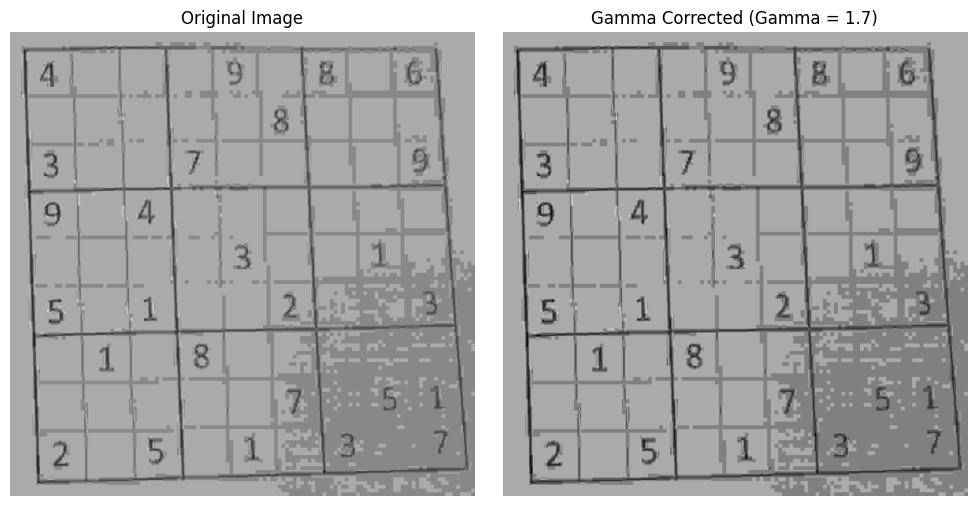

In [183]:
gamma = 1.7

# Apply gamma correction using Numpy's power function
gamma_corrected = np.uint8((img_gray / 255.0) ** gamma * 255.0)

# Plot the original and gamma-corrected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f'Gamma Corrected (Gamma = {gamma})')
plt.axis('off')

plt.tight_layout()
plt.show()


Histogram Equalization


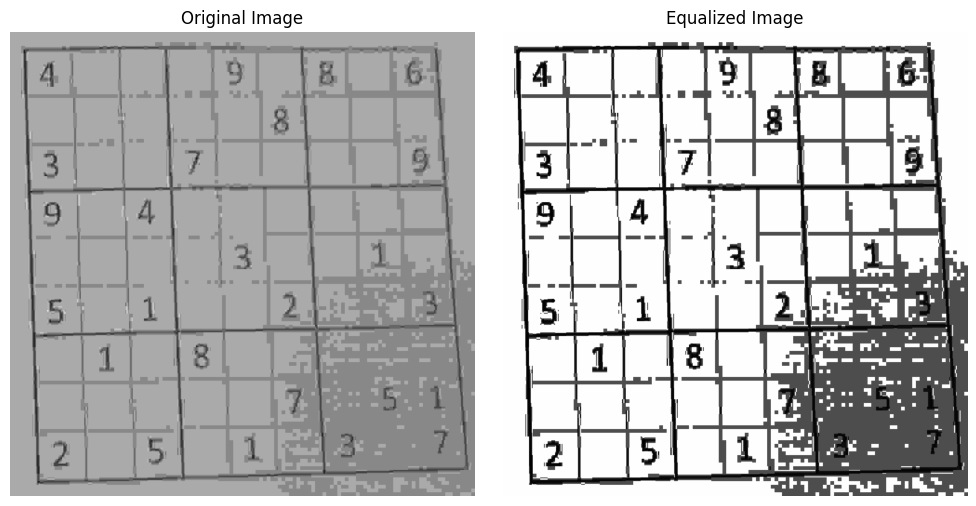

In [184]:
equalized_image = cv2.equalizeHist(img_gray)

# Display original and equalized images using Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

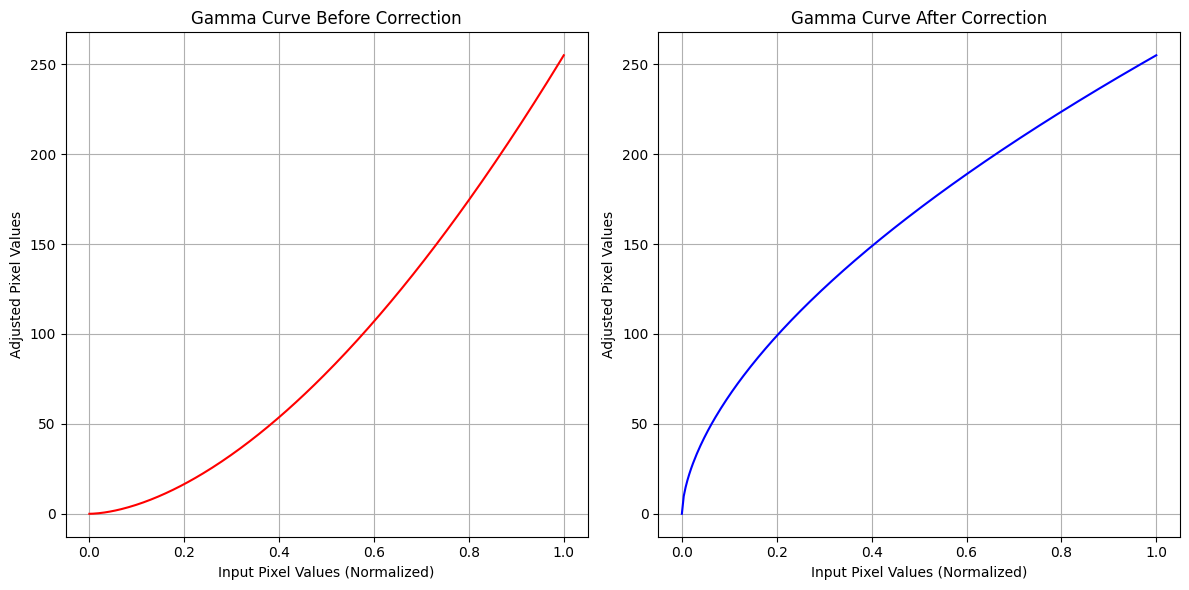

In [185]:
gamma = 1.7

# Generate input pixel values from 0 to 255
input_values = np.arange(0, 256) / 255.0

# Calculate adjusted values using gamma correction formula before and after
adjusted_values_before = np.power(input_values, gamma) * 255.0
adjusted_values_after = np.power(input_values, 1/gamma) * 255.0

# Plot the gamma curves before and after gamma correction
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(input_values, adjusted_values_before, color='red')
plt.title('Gamma Curve Before Correction')
plt.xlabel('Input Pixel Values (Normalized)')
plt.ylabel('Adjusted Pixel Values')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(input_values, adjusted_values_after, color='blue')
plt.title('Gamma Curve After Correction')
plt.xlabel('Input Pixel Values (Normalized)')
plt.ylabel('Adjusted Pixel Values')
plt.grid(True)

plt.tight_layout()
plt.show()

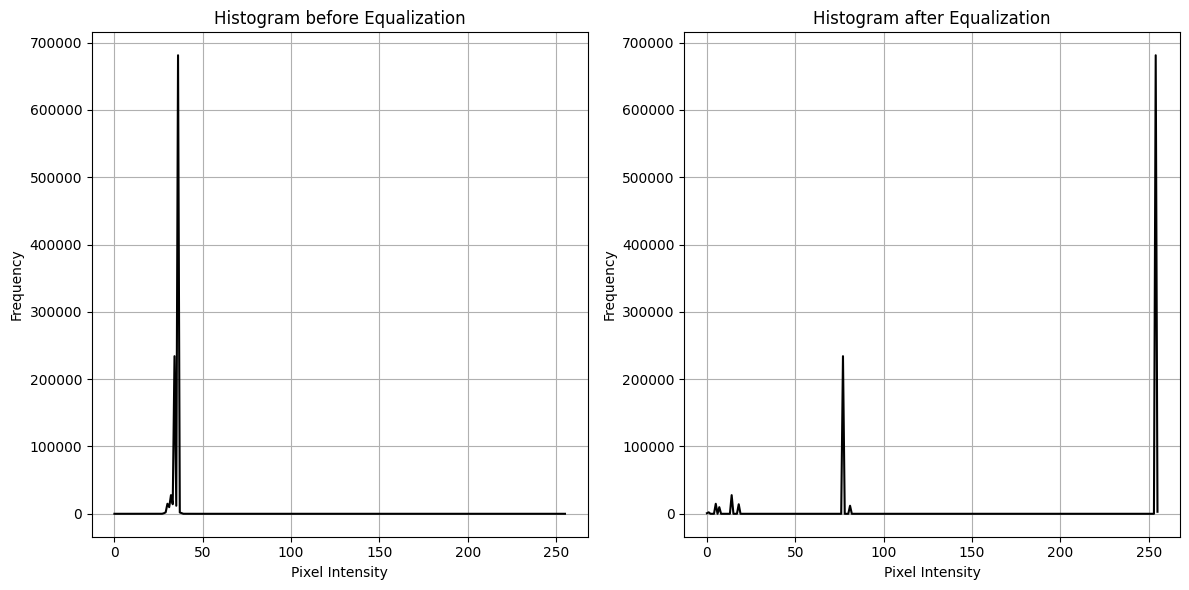

In [186]:
hist_original = cv2.calcHist([img_gray], [0], None, [256], [0,256])


# Calculate histogram of equalized image
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0,256])

# Plot histograms before and after equalization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(hist_original, color='black')
plt.title('Histogram before Equalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(hist_equalized, color='black')
plt.title('Histogram after Equalization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

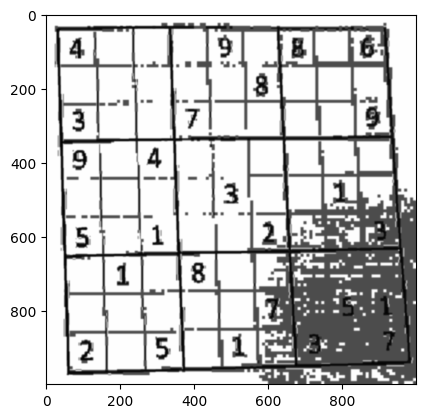

In [187]:
img_gray_equalized = cv2.equalizeHist(img_gray)
img_gray_blurred = cv2.GaussianBlur(img_gray_equalized, (7, 7), 0)
plt.imshow(img_gray_blurred,cmap='gray')
plt.show()



# Thresholding step
We don't need the full scale of grayscale either, just binary. But, is ordinary thresholding enough? Or is "adaptive thresholding" better?

Do your research!


### Adaptive Thresholding is better because it will adapt to the change of light intensity along the image as we see here global thresholding will alaways result in losing some of the image due to the change of light intensity along the image

Text(0.5, 1.0, 'Global Thresholding')

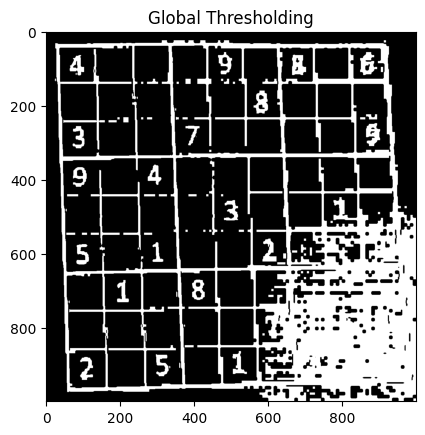

In [188]:
_, img_gray_global_threshed = cv2.threshold(img_gray_blurred, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_gray_global_threshed, cmap='gray')
plt.title('Global Thresholding')



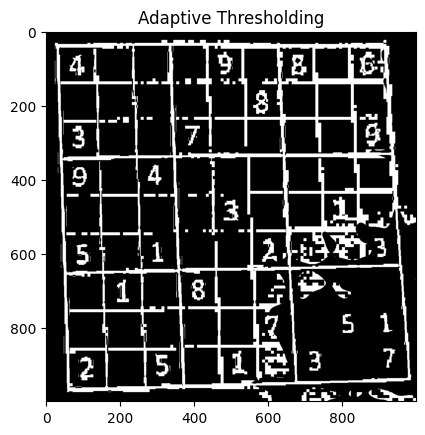

In [189]:
img_gray_threshed = cv2.adaptiveThreshold(src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=blockSize,
    C=c
)
plt.title('Adaptive Thresholding') 
plt.imshow(img_gray_threshed, cmap="gray");

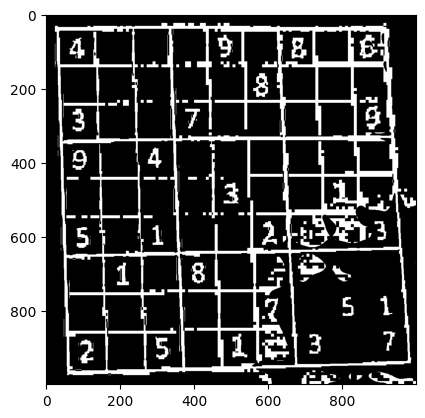

In [190]:
####################ADDED just trying some morphological methods################
kernel1 =np.ones((3,3),np.uint8)
closing =cv2.morphologyEx(img_gray_threshed,cv2.MORPH_CLOSE,kernel1)
plt.imshow(closing,cmap="gray")


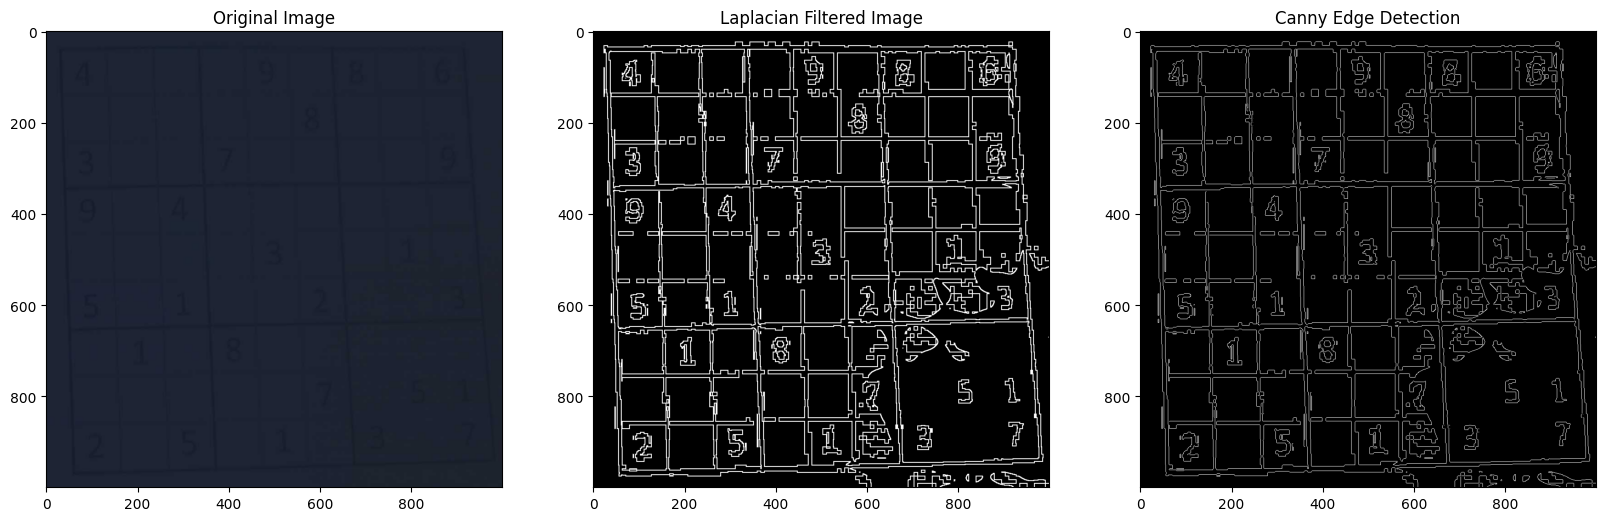

In [191]:
###########Added by Mazen###################
# Load the original image
image_original = img

# Convert image to grayscale
image_gray = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# Reduce noise in image
img_gauss = cv2.GaussianBlur(img_gray_threshed, (3, 3), 0)

# Filter the image using Laplacian
filtered_image = cv2.Laplacian(img_gray_threshed, cv2.CV_16S, ksize=3)
filtered_image = cv2.convertScaleAbs(filtered_image)

# Apply Canny edge detection on the filtered image
edges = cv2.Canny(img_gray_threshed, threshold1=15, threshold2=255)  # Adjust thresholds as needed

# Plotting the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 15))
ax1.set_title('Original Image')
ax1.imshow(cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB))

ax2.set_title('Laplacian Filtered Image')
ax2.imshow(filtered_image, cmap='gray')

ax3.set_title('Canny Edge Detection')
ax3.imshow(edges, cmap='gray')

plt.show()


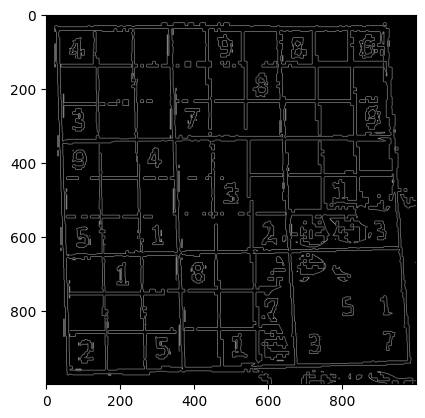

In [192]:
bilateral_image = cv2.bilateralFilter(edges, 9, 75, 75)
plt.imshow(cv2.cvtColor(bilateral_image, cv2.COLOR_BGR2RGB))
plt.show()

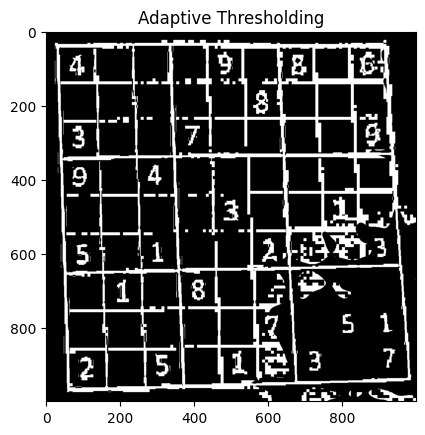

In [193]:
img_gray_threshed = cv2.adaptiveThreshold(src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=blockSize,
    C=c
)
plt.title('Adaptive Thresholding')
plt.imshow(img_gray_threshed, cmap="gray");

# Detect the lines
One way is to use Hough transform. It may not be the best way, there are other ways, and I've done zero noise removal in this guide so far.

This is very sub-optimal and will most likely not work reliably on all cases. Do your research!

### Enhancement : One way is getting the biggest contour in the image 

In [194]:
####################ADDED################
def biggestContour (contours):
    biggest=np.array([])

    max_area=0
    for i in contours:
        area=cv2.contourArea(i)
        if area>1000:
            peri=cv2.arcLength(i,True)
            approx=cv2.approxPolyDP(i,0.02*peri,True)
            if area > max_area and len(approx)==4:
                biggest=approx
                max_area=area
    return biggest,max_area
def reorder(myPoints):
    myPoints=myPoints.reshape((4,2))
    myPointsNew=np.zeros((4,1,2),dtype=np.int32)
    add=myPoints.sum(1)
    myPointsNew[0]=myPoints[np.argmin(add)]
    myPointsNew[3]=myPoints[np.argmax(add)]
    diff=np.diff(myPoints,axis=1)
    myPointsNew[1]=myPoints[np.argmin(diff)]
    myPointsNew[2]=myPoints[np.argmax(diff)]
    return myPointsNew

    


In [195]:
# image = cv2.imread('C:/Users/Mazen Mohamed/Downloads/05-Ya3amSheel2elCoinYa3am.jpg')
#
# points_to_remove = np.array([
#     [935, 92],
#     [800, 92],
#     [760, 92],
#     [790, 92],
#     [795, 92]
# ])
#
# # Create a mask to cover the points to be removed
# mask = np.zeros_like(image, dtype=np.uint8)
# cv2.fillPoly(mask, [points_to_remove], (255, 255, 255))  # Fill the points with white color (you can change the color)
#
# # Invert the mask
# mask_inv = cv2.bitwise_not(mask)
#
# # Apply the mask to the image to remove the specified points
# result = cv2.bitwise_and(image, mask_inv)
# res=cv2.cvtColor(result,cv2.COLOR_RGB2GRAY)
# plt.imshow(result,cmap="gray")

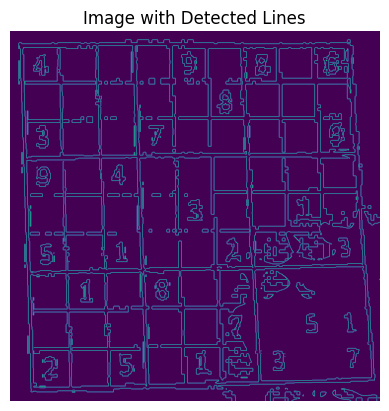

In [196]:

edges = cv2.Canny(img_gray_threshed,50,150,apertureSize = 3)
lines = cv2.HoughLinesP(edges,1,np.pi/180,20,minLineLength=100,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(255,255,255),2)
# Display the image with detected lines using Matplotlib
plt.imshow(edges)
plt.axis('off')  # Turn off axis labels
plt.title('Image with Detected Lines')
plt.show()


In [197]:
if mean_intensity==114.199791:
    img_gray_threshed=bilateral_image
else:
    img_gray_threshed=img_gray_threshed

### Outer frame corners identification

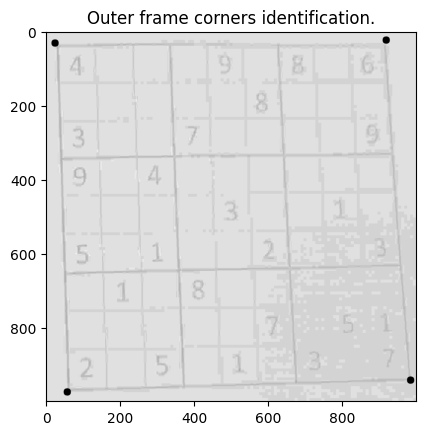

In [198]:
####################ADDED################
heightImg=600
widthImg=600
imgContours=img_gray.copy()
imgBigContour=img_gray.copy()
contours, hierarchy, =cv2.findContours(img_gray_threshed,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imgContours,contours,-1,(0,255,0),10)
biggest,maxArea=biggestContour(contours)
if biggest.size !=0:
    biggest=reorder(biggest)
    cv2.drawContours(imgBigContour,biggest,-1,(0,255,0),20)

    pts1=np.float32(biggest)
    pts2=np.float32([[0,0],[widthImg,0],[0,heightImg],[widthImg,heightImg]])
    matrix=cv2.getPerspectiveTransform(pts1,pts2)
    imgWrapedgrey=cv2.warpPerspective(img_gray,matrix,(widthImg,heightImg))
    # imgDetectedDigits=imgBlank.copy()

    # imgWrapedColored=cv2.cvtColor(imgWarpColored,cv2.COLOR_BGR2GRAY)
plt.title('Outer frame corners identification.') 
plt.imshow(imgBigContour,cmap="gray")

In [199]:
# # Assuming closed_image is your binary image
# contours, hier = cv2.findContours(img_gray_threshed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#
# # Sort contours based on their areas in descending order
# contours = sorted(contours, key=cv2.contourArea, reverse=True)
#
# # Initialize an empty mask
# mask = np.zeros(img_gray_threshed.shape, np.uint8)
#
# # Iterate through the sorted contours
# for cnt in contours:
#     area = cv2.contourArea(cnt)
#
#     # Filter contours based on your criteria, e.g., area > 1000
#     if area > 1000:
#         best_cnt = cnt
#
#         # Draw the largest contour filled with white on the mask
#         cv2.drawContours(mask, [best_cnt], 0, 255, thickness=cv2.FILLED)
#
#         # Draw the same contour with a thickness of 2 in black
#         cv2.drawContours(mask, [best_cnt], 0, 200, thickness=30)
#
#         break  # Assuming the first contour meeting the criteria is the Sudoku puzzle
#
# # Bitwise AND operation to mask the original image
# res = cv2.bitwise_and(img_gray_threshed, mask)
#
# # Display the result
# plt.imshow(res, cmap="gray")
# plt.show()

## Image warpping (Outer frame isolation)

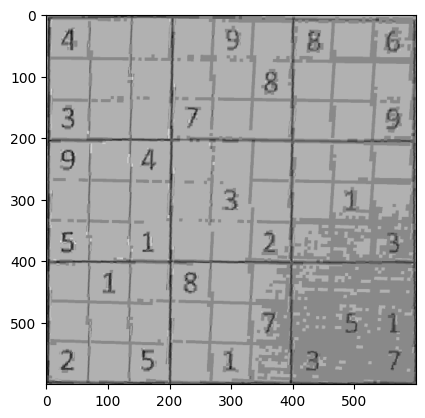

In [200]:
####################ADDED################
plt.imshow(imgWrapedgrey,cmap="gray")


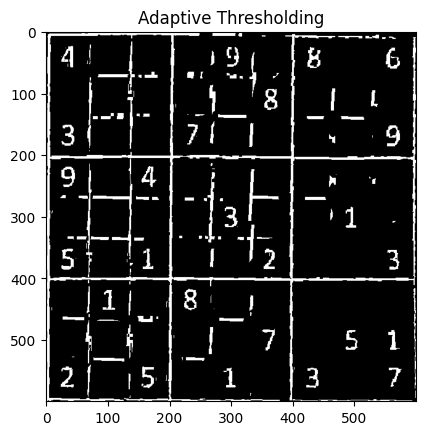

In [205]:
####################ADDED################

img_gray_threshed = cv2.adaptiveThreshold(src=imgWrapedgrey,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=93,
    C=2


)
plt.title('Adaptive Thresholding') 
plt.imshow(img_gray_threshed, cmap="gray");

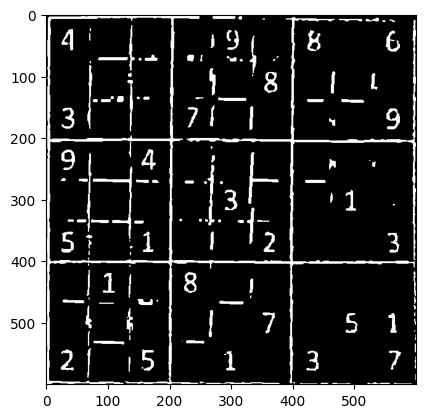

In [206]:
kernel_size = 3
img_median_filtered = cv2.medianBlur(img_gray_threshed, kernel_size)
plt.imshow(img_median_filtered,cmap="gray")

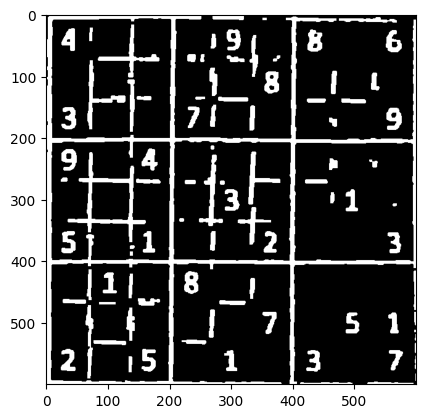

In [232]:
kernel1 =np.ones((3,4),np.uint8)
opening=cv2.morphologyEx(img_median_filtered,cv2.MORPH_DILATE,kernel1)
closing =cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel1)
#\opening=cv2.morphologyEx(closing,cv2.MORPH_DILATE,kernel1)
img_gray_threshed=closing
plt.imshow(closing,cmap="gray")

# Separate the number tiles
Finally, you get each value in a tile of its own, ready to go to phase 2 (OCR).

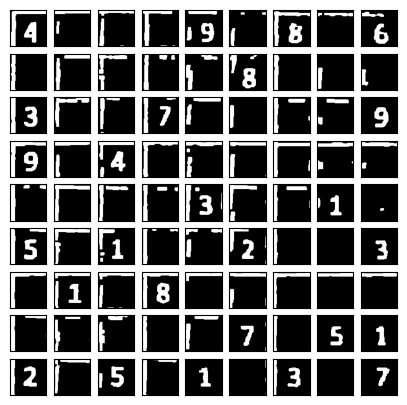

In [233]:
#CHANGED img_gray_threshed_warped to img_gray_threshed

M = img_gray_threshed.shape[0] // 9
N = img_gray_threshed.shape[1] // 9
number_tiles = []
for i in range(9):
    number_tiles.append([])
    for j in range(9):
        tile = img_gray_threshed[i*M:(i+1)*M, j*N:(j+1)*N]
        number_tiles[i].append(tile)

_, axes = plt.subplots(9, 9, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(number_tiles[i][j], cmap="gray");
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)

In [2]:
import cv2
import numpy as np

# Global variables to store the coordinates of the selected region
start_point = None
end_point = None
cropping = False

def mouse_callback(event, x, y, flags, param):
    global start_point, end_point, cropping

    if event == cv2.EVENT_LBUTTONDOWN:
        start_point = (x, y)
        cropping = True
    elif event == cv2.EVENT_LBUTTONUP:
        end_point = (x, y)
        cropping = False

        # Draw a rectangle around the selected region
        cv2.rectangle(image, start_point, end_point, (0, 255, 0), 2)
        cv2.imshow("Select Region", image)

# Load image
image = cv2.imread('01-Normal.jpg')
clone = image.copy()
cv2.namedWindow("Select Region")
cv2.setMouseCallback("Select Region", mouse_callback)

# Keep selecting the region until 'c' is pressed
while True:
    cv2.imshow("Select Region", image)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("c"):
        break

# Extract the coordinates of the selected region
x1, y1 = start_point
x2, y2 = end_point

# Print the coordinates
print("Starting point:", start_point)
print("Ending point:", end_point)
print("Coordinates of the selected region: (x1={}, y1={}), (x2={}, y2={})".format(x1, y1, x2, y2))

# Display the selected region
cv2.imshow("Selected Region", clone[y1:y2, x1:x2])
cv2.waitKey(0)
cv2.destroyAllWindows()


Starting point: (46, 47)
Ending point: (345, 344)
Coordinates of the selected region: (x1=46, y1=47), (x2=345, y2=344)
